# Chapter 9: Classification and Regression Trees

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>
> Code included in
>
> _Data Mining for Business Analytics: Concepts, Techniques, and Applications in Python_ (First Edition) 
> Galit Shmueli, Peter C. Bruce, Peter Gedeck, and Nitin R. Patel. 2019.

## Import required packages

In [4]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from sklearn import tree as tr
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# import matplotlib.pyplot as plt 만 했을때 no display .. agg로 설정되는 경우 아래 실행
#import matplotlib
#matplotlib.use('module://matplotlib_inline.backend_inline')

import matplotlib.pyplot as plt
import dmba
from dmba import plotDecisionTree, classificationSummary, regressionSummary


## Figure 9-2

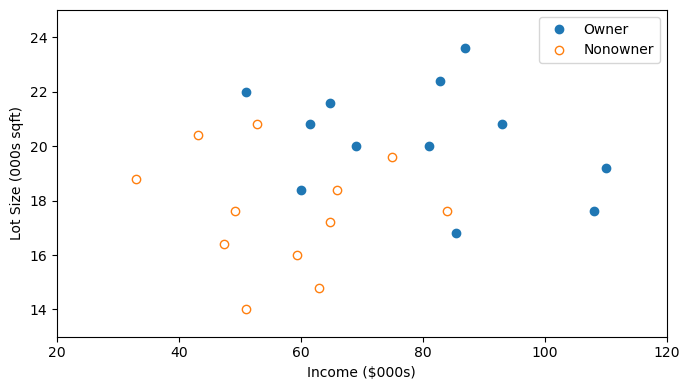

In [32]:
def basePlot(ax):
    mower_df.loc[mower_df.Ownership=='Owner'].plot(x='Income', y='Lot_Size', style='o', 
                                                   markerfacecolor='C0', markeredgecolor='C0',
                                                   ax=ax)
    mower_df.loc[mower_df.Ownership=='Nonowner'].plot(x='Income', y='Lot_Size', style='o',
                                                      markerfacecolor='none', markeredgecolor='C1',
                                                      ax=ax)
    ax.legend(["Owner", "Nonowner"]);
    ax.set_xlim(20, 120)
    ax.set_ylim(13, 25)
    ax.set_xlabel('Income ($000s)')
    ax.set_ylabel('Lot Size (000s sqft)')
    return ax

fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
plt.tight_layout()
plt.show()

## Figure 9-3

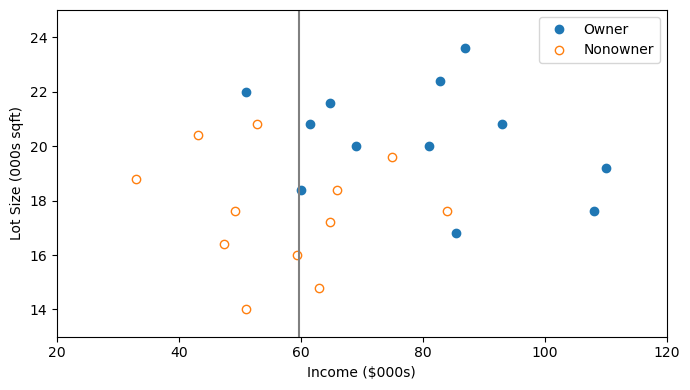

In [33]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
ax.plot((x0, x0), (25, 13), color='grey')
plt.tight_layout()
plt.show()

## Figure 9-5

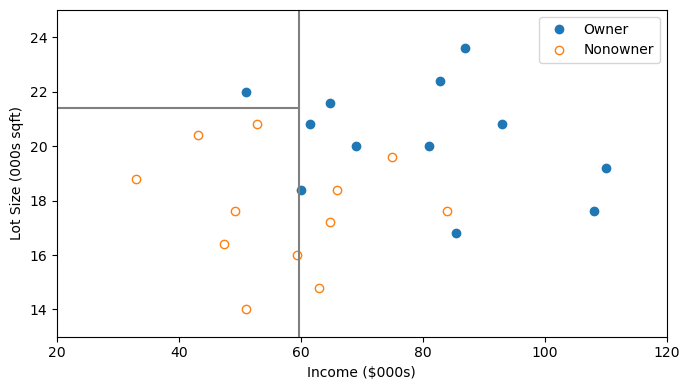

In [36]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
y1 = 21.4
ax.plot((x0, x0), (25, 13), color='grey')
ax.plot((20, x0), (y1, y1), color='grey')
plt.tight_layout()
plt.show()

## Figure 9-6

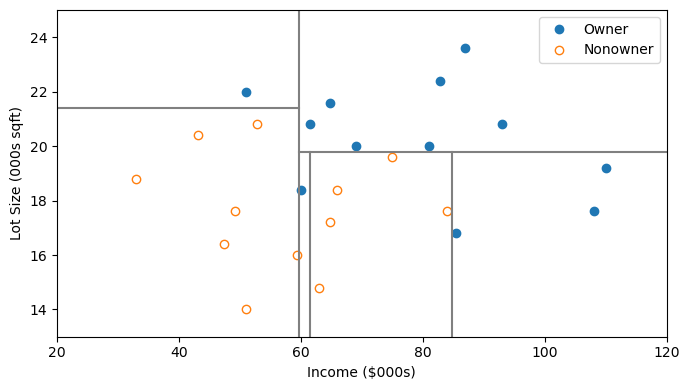

In [39]:
fig, ax = plt.subplots(figsize=(7, 4))

ax = basePlot(ax)
x0 = 59.7
y1 = 21.4
y2 = 19.8
x3 = 84.75
x4 = 61.5
ax.plot((x0, x0), (25, 13), color='grey')
ax.plot((20, x0), (y1, y1), color='grey')
ax.plot((x0, 120), (y2, y2), color='grey')
ax.plot((x3, x3), (13, y2), color='grey')
ax.plot((x4, x4), (13, y2), color='grey')
plt.tight_layout()
plt.show()

## Figure 9.7

Classes: Nonowner, Owner


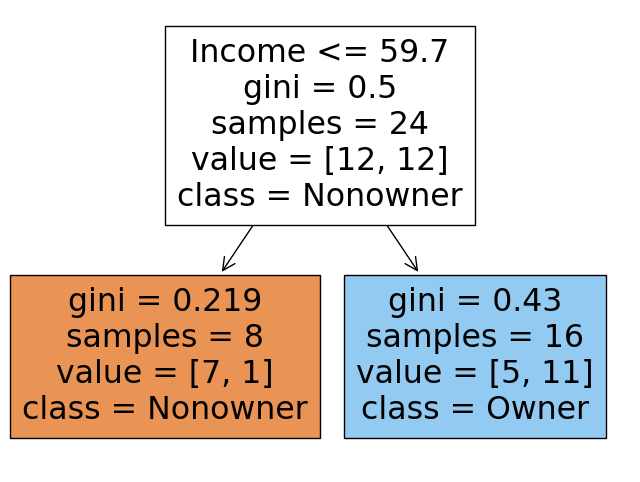

In [6]:
mower_df = pd.read_csv('../data/RidingMowers.csv')

classTree = DecisionTreeClassifier(random_state=0, max_depth=1)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

print("Classes: {}".format(', '.join(classTree.classes_)))

fig = plt.figure(figsize=(8,6))
_ = tr.plot_tree(classTree, 
                   feature_names=mower_df.columns[:2],  
                   class_names=classTree.classes_,
                   filled=True)

## Figure 9-9
최대나무

Classes: Nonowner, Owner


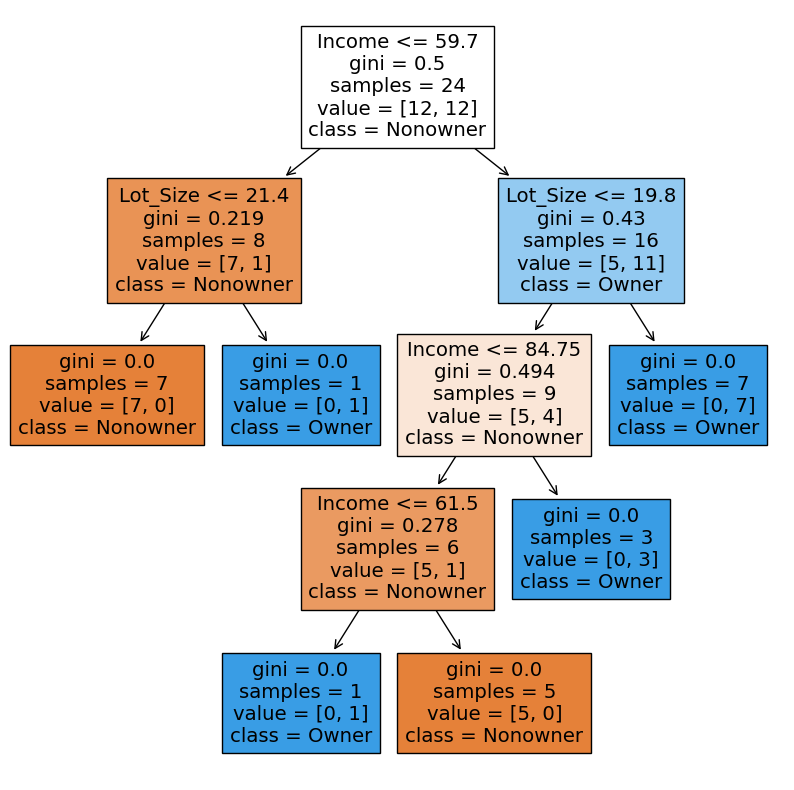

In [7]:
classTree = DecisionTreeClassifier(random_state=0)
classTree.fit(mower_df.drop(columns=['Ownership']), mower_df['Ownership'])

print("Classes: {}".format(', '.join(classTree.classes_)))

fig = plt.figure(figsize=(10,10))
_ = tr.plot_tree(classTree, 
                   feature_names=mower_df.columns[:2],  
                   class_names=classTree.classes_,
                   filled=True)

## Figure 9.10

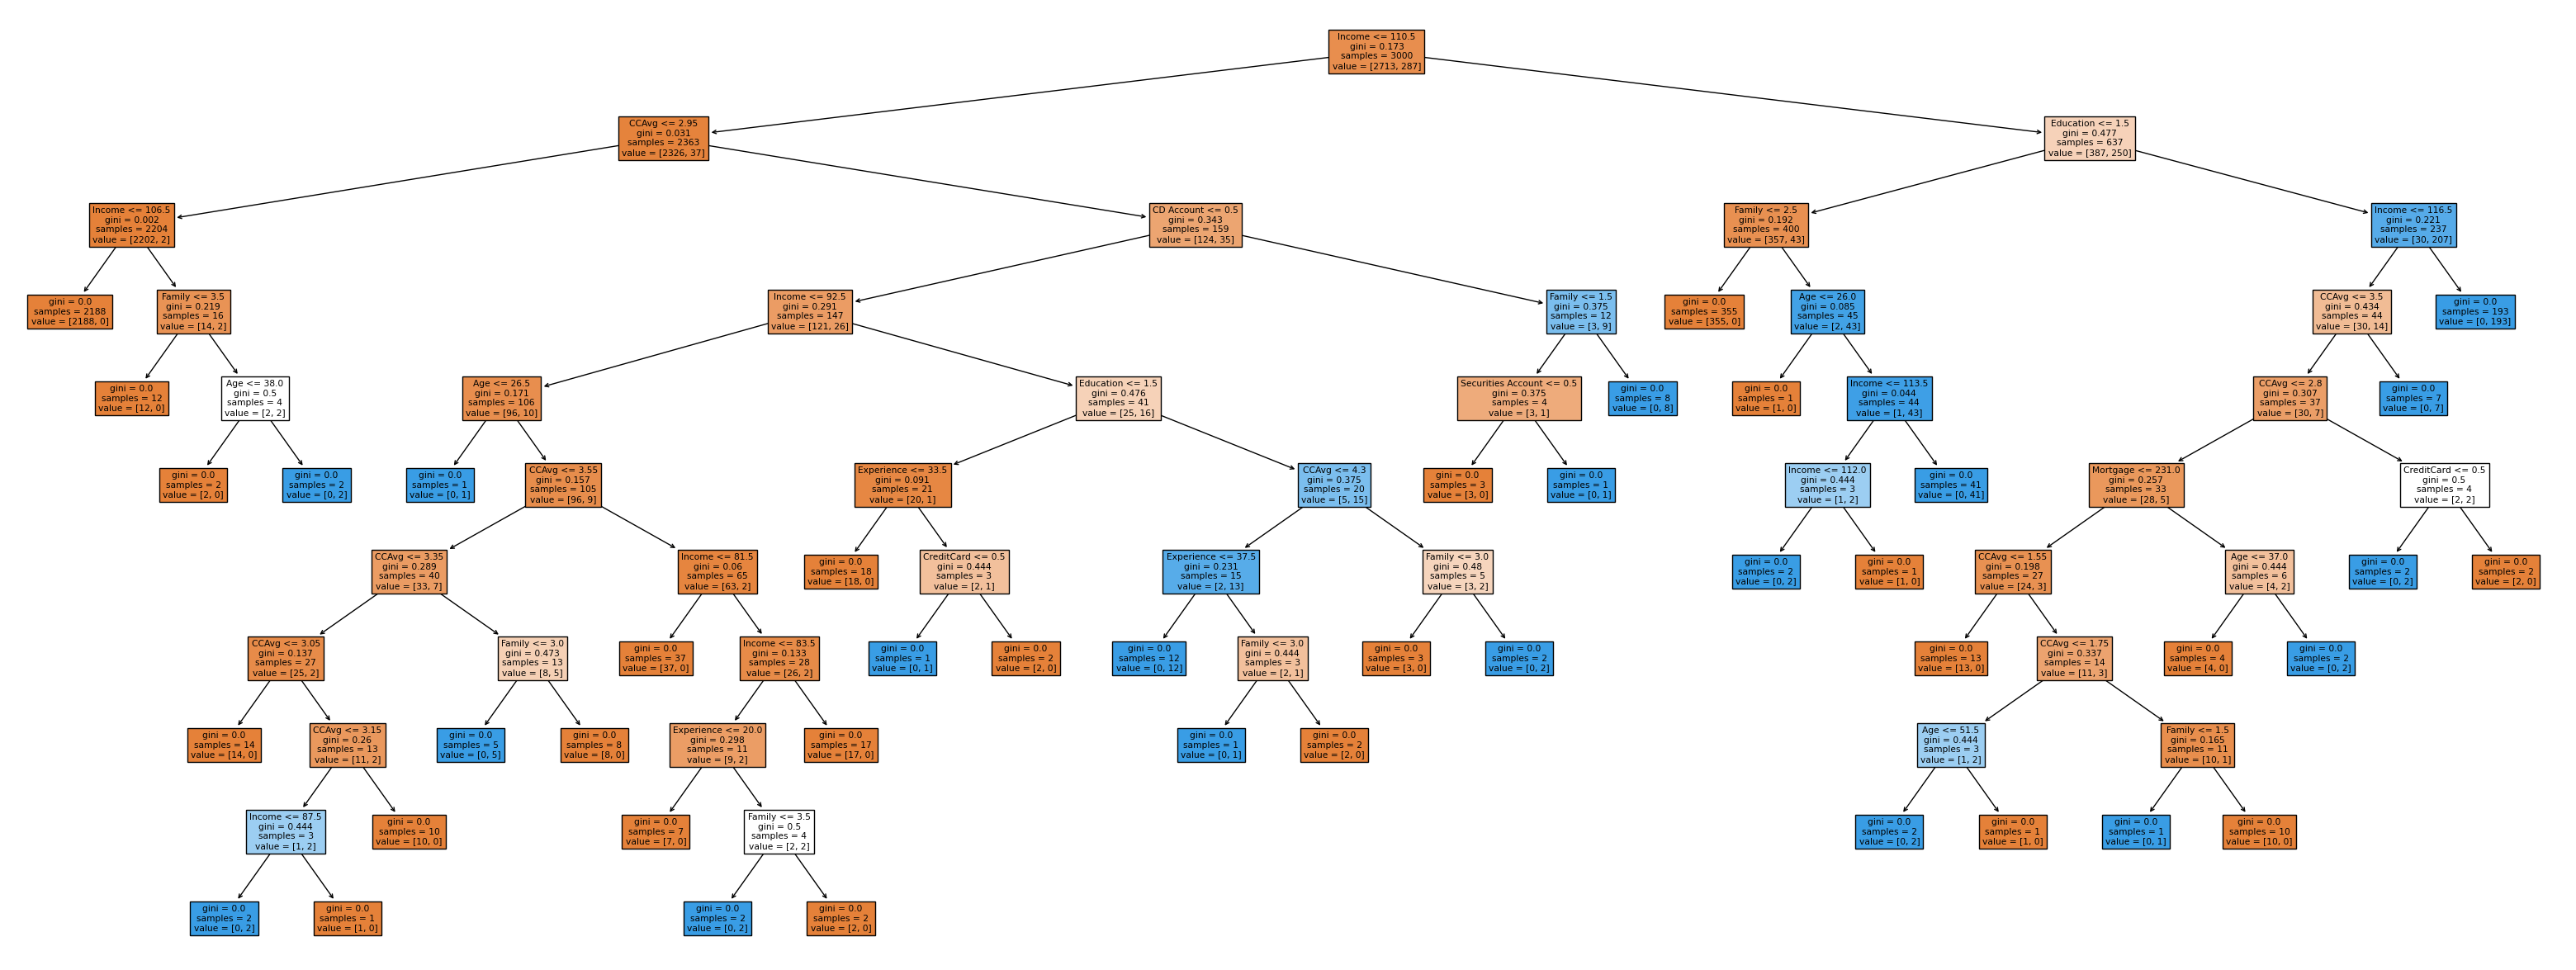

In [8]:
bank_df = pd.read_csv('../data/UniversalBank.csv')
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

fullClassTree = DecisionTreeClassifier()
fullClassTree.fit(train_X, train_y)

fig = plt.figure(figsize=(40,15))
_ = tr.plot_tree(fullClassTree, 
                   feature_names=train_X.columns, 
                   filled=True)

## Table 9.3
<!-- <div class='alert alert-danger'>R output for reference - remove once missing metrics are available.
```
> confusionMatrix(default.ct.point.pred.train, train.df$Personal.Loan)
Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2696   26
         1   13  265
                                          
               Accuracy : 0.987           
                 95% CI : (0.9823, 0.9907)
    No Information Rate : 0.903           
    P-Value [Acc > NIR] : < 2e-16         
                                          
                  Kappa : 0.9243          
 Mcnemar's Test P-Value : 0.05466         
                                          
            Sensitivity : 0.9952          
            Specificity : 0.9107          
         Pos Pred Value : 0.9904          
         Neg Pred Value : 0.9532          
             Prevalence : 0.9030          
         Detection Rate : 0.8987          
   Detection Prevalence : 0.9073          
      Balanced Accuracy : 0.9529          
                                          
       'Positive' Class : 0               
```
</div>-->

In [9]:
classificationSummary(train_y, fullClassTree.predict(train_X))
classificationSummary(valid_y, fullClassTree.predict(valid_X))

Confusion Matrix (Accuracy 1.0000)

       Prediction
Actual    0    1
     0 2713    0
     1    0  287
Confusion Matrix (Accuracy 0.9800)

       Prediction
Actual    0    1
     0 1790   17
     1   23  170


## Table 9.4

In [10]:
# Five-fold cross-validation of the full decision tree classifier
treeClassifier = DecisionTreeClassifier()

scores = cross_val_score(treeClassifier, train_X, train_y, cv=5)
print('Accuracy scores of each fold: ', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std():.3f})')

Accuracy scores of each fold:  ['0.988', '0.970', '0.995', '0.985', '0.992']
Accuracy: 0.986 (+/- 0.017)
Accuracy: 0.986 (+/- 0.009)


## Figure 9.12

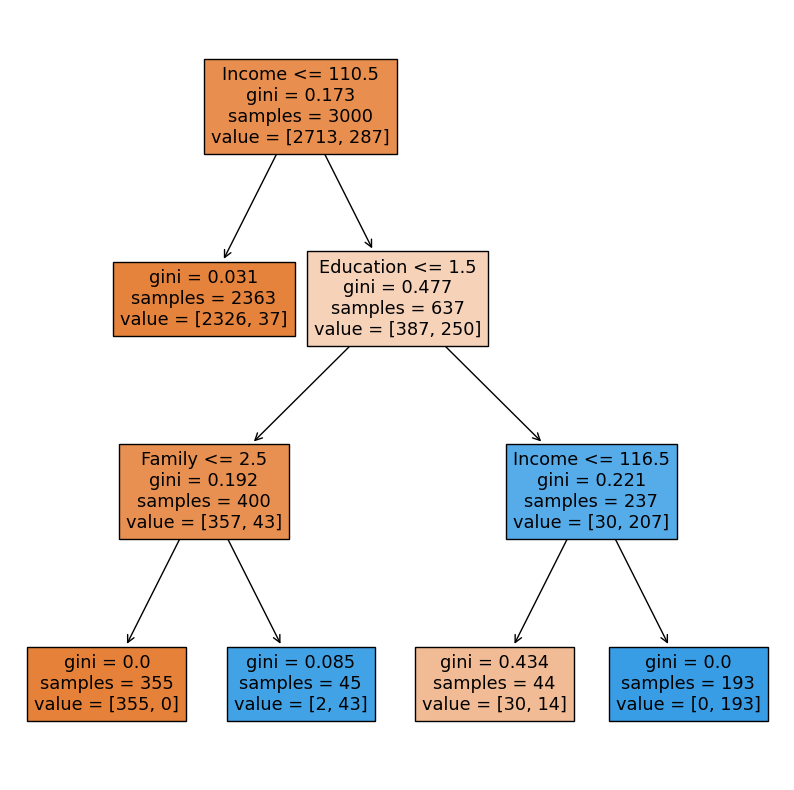

In [12]:
smallClassTree = DecisionTreeClassifier(max_depth=30, min_samples_split=20, min_impurity_decrease=0.01)
smallClassTree.fit(train_X, train_y)

fig = plt.figure(figsize=(10,10))
_ = tr.plot_tree(smallClassTree, 
                   feature_names=train_X.columns, 
                   filled=True)

## Table 9.5

In [13]:
classificationSummary(train_y, smallClassTree.predict(train_X))
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9823)

       Prediction
Actual    0    1
     0 2711    2
     1   51  236
Confusion Matrix (Accuracy 0.9770)

       Prediction
Actual    0    1
     0 1804    3
     1   43  150


## Grid search

## Table 9.6 and Figure 9-13

In [14]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial score: ', gridSearch.best_score_)
print('Initial parameters: ', gridSearch.best_params_)

# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(2, 16)), 
    'min_samples_split': list(range(10, 22)), 
    'min_impurity_decrease': [0.0009, 0.001, 0.0011], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', gridSearch.best_score_)
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Initial score:  0.9876666666666667
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}
Improved score:  0.9873333333333333
Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0011, 'min_samples_split': 13}


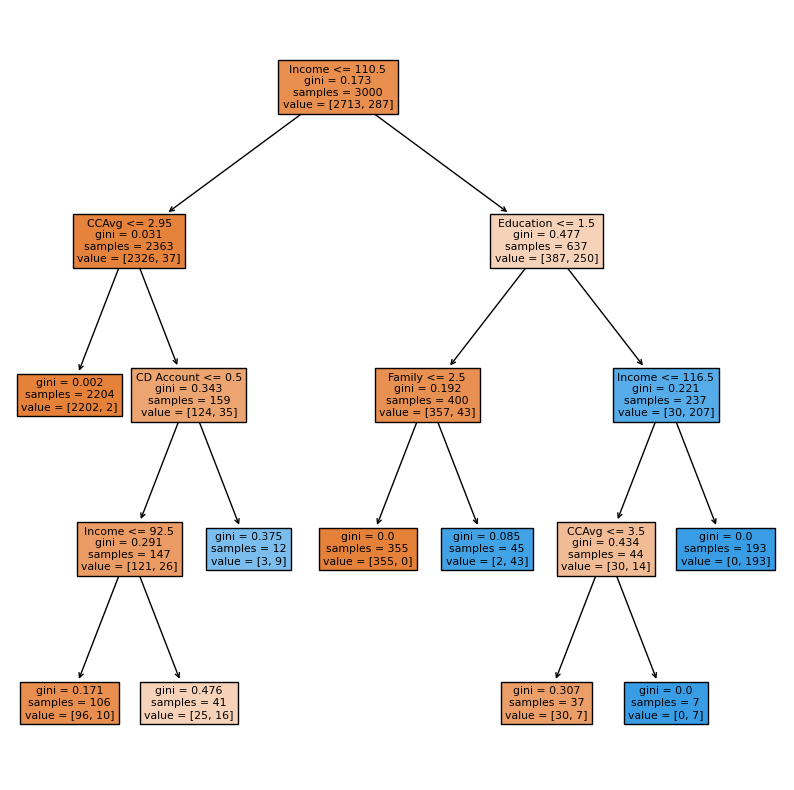

In [15]:
fig = plt.figure(figsize=(10,10))
_ = tr.plot_tree(bestClassTree, 
                   feature_names=train_X.columns, 
                   filled=True)

In [16]:
classificationSummary(train_y, bestClassTree.predict(train_X))
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion Matrix (Accuracy 0.9867)

       Prediction
Actual    0    1
     0 2708    5
     1   35  252
Confusion Matrix (Accuracy 0.9815)

       Prediction
Actual    0    1
     0 1801    6
     1   31  162


## 변수 중요도 Feature Importances

               feature  importance
0                  Age    0.000000
1           Experience    0.000000
6             Mortgage    0.000000
7   Securities Account    0.000000
9               Online    0.000000
10          CreditCard    0.000000
8           CD Account    0.015921
4                CCAvg    0.048042
3               Family    0.159314
5            Education    0.381413
2               Income    0.395310


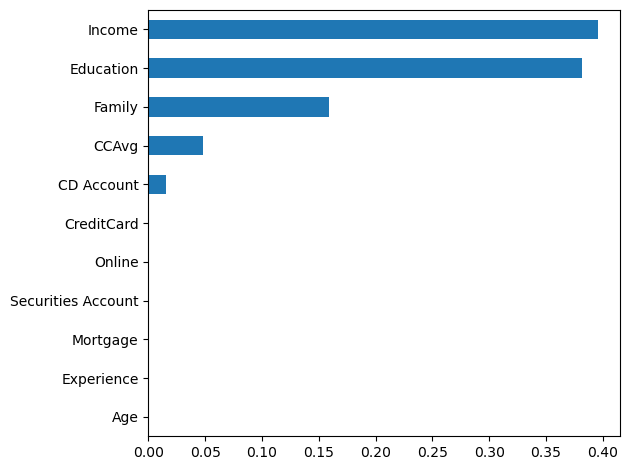

In [25]:
importances = bestClassTree.feature_importances_

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

## RandomizedCV( )

In [27]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, loguniform
import numpy as np

# --- 1) 1차 무작위 탐색: 기존 그리드 범위에서 랜덤 샘플링 ---
param_distributions_1 = {
    'max_depth': [10, 20, 30, 40],
    'min_samples_split': [20, 40, 60, 80, 100],
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01],
}
randSearch = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_distributions_1,
    n_iter=20,                 # 시도할 조합 개수 (필요시 조정)
    cv=5,
    n_jobs=-1,
    random_state=42
)
randSearch.fit(train_X, train_y)
print('Initial score: ', randSearch.best_score_)
print('Initial parameters: ', randSearch.best_params_)

# --- 2) 2차 미세 탐색: 좁은 범위에서 분포 기반 무작위 샘플링 ---
param_distributions_2 = {
    'max_depth': list(range(2, 16)),           
    'min_samples_split': list(range(10, 22)),   
    # loguniform은 로그 스케일에서 균일 샘플링 (미세값 탐색에 유리)
    'min_impurity_decrease': loguniform(9e-4, 1.1e-3)
}
randSearch = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(),
    param_distributions=param_distributions_2,
    n_iter=30,                 # 시도할 조합 개수 (필요시 조정)
    cv=5,
    n_jobs=-1,
    random_state=42
)
randSearch.fit(train_X, train_y)
print('Improved score: ', randSearch.best_score_)
print('Improved parameters: ', randSearch.best_params_)

bestClassTree = randSearch.best_estimator_

Initial score:  0.9876666666666667
Initial parameters:  {'min_samples_split': 20, 'min_impurity_decrease': 0.0005, 'max_depth': 40}
Improved score:  0.9873333333333333
Improved parameters:  {'max_depth': 4, 'min_impurity_decrease': 0.0010695139830313373, 'min_samples_split': 16}


## Regression Trees : Table 9.7 and Figure 9.14

In [17]:
toyotaCorolla_df = pd.read_csv('../data/ToyotaCorolla.csv').iloc[:1000,:]
toyotaCorolla_df = toyotaCorolla_df.rename(columns={'Age_08_04': 'Age', 'Quarterly_Tax': 'Tax'})

predictors = ['Age', 'KM', 'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'CC', 
              'Doors', 'Tax', 'Weight']
outcome = 'Price'

X = pd.get_dummies(toyotaCorolla_df[predictors], drop_first=True)
y = toyotaCorolla_df[outcome]

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

# user grid search to find optimized tree
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20, ], 
}
gridSearch = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_

Initial parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 20}
Improved parameters:  {'max_depth': 6, 'min_impurity_decrease': 0, 'min_samples_split': 16}


In [18]:
regressionSummary(train_y, regTree.predict(train_X))
regressionSummary(valid_y, regTree.predict(valid_X))


Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 1058.8202
            Mean Absolute Error (MAE) : 767.7203
          Mean Percentage Error (MPE) : -0.8074
Mean Absolute Percentage Error (MAPE) : 6.8325

Regression statistics

                      Mean Error (ME) : 60.5241
       Root Mean Squared Error (RMSE) : 1554.9146
            Mean Absolute Error (MAE) : 1026.3487
          Mean Percentage Error (MPE) : -1.3082
Mean Absolute Percentage Error (MAPE) : 9.2311


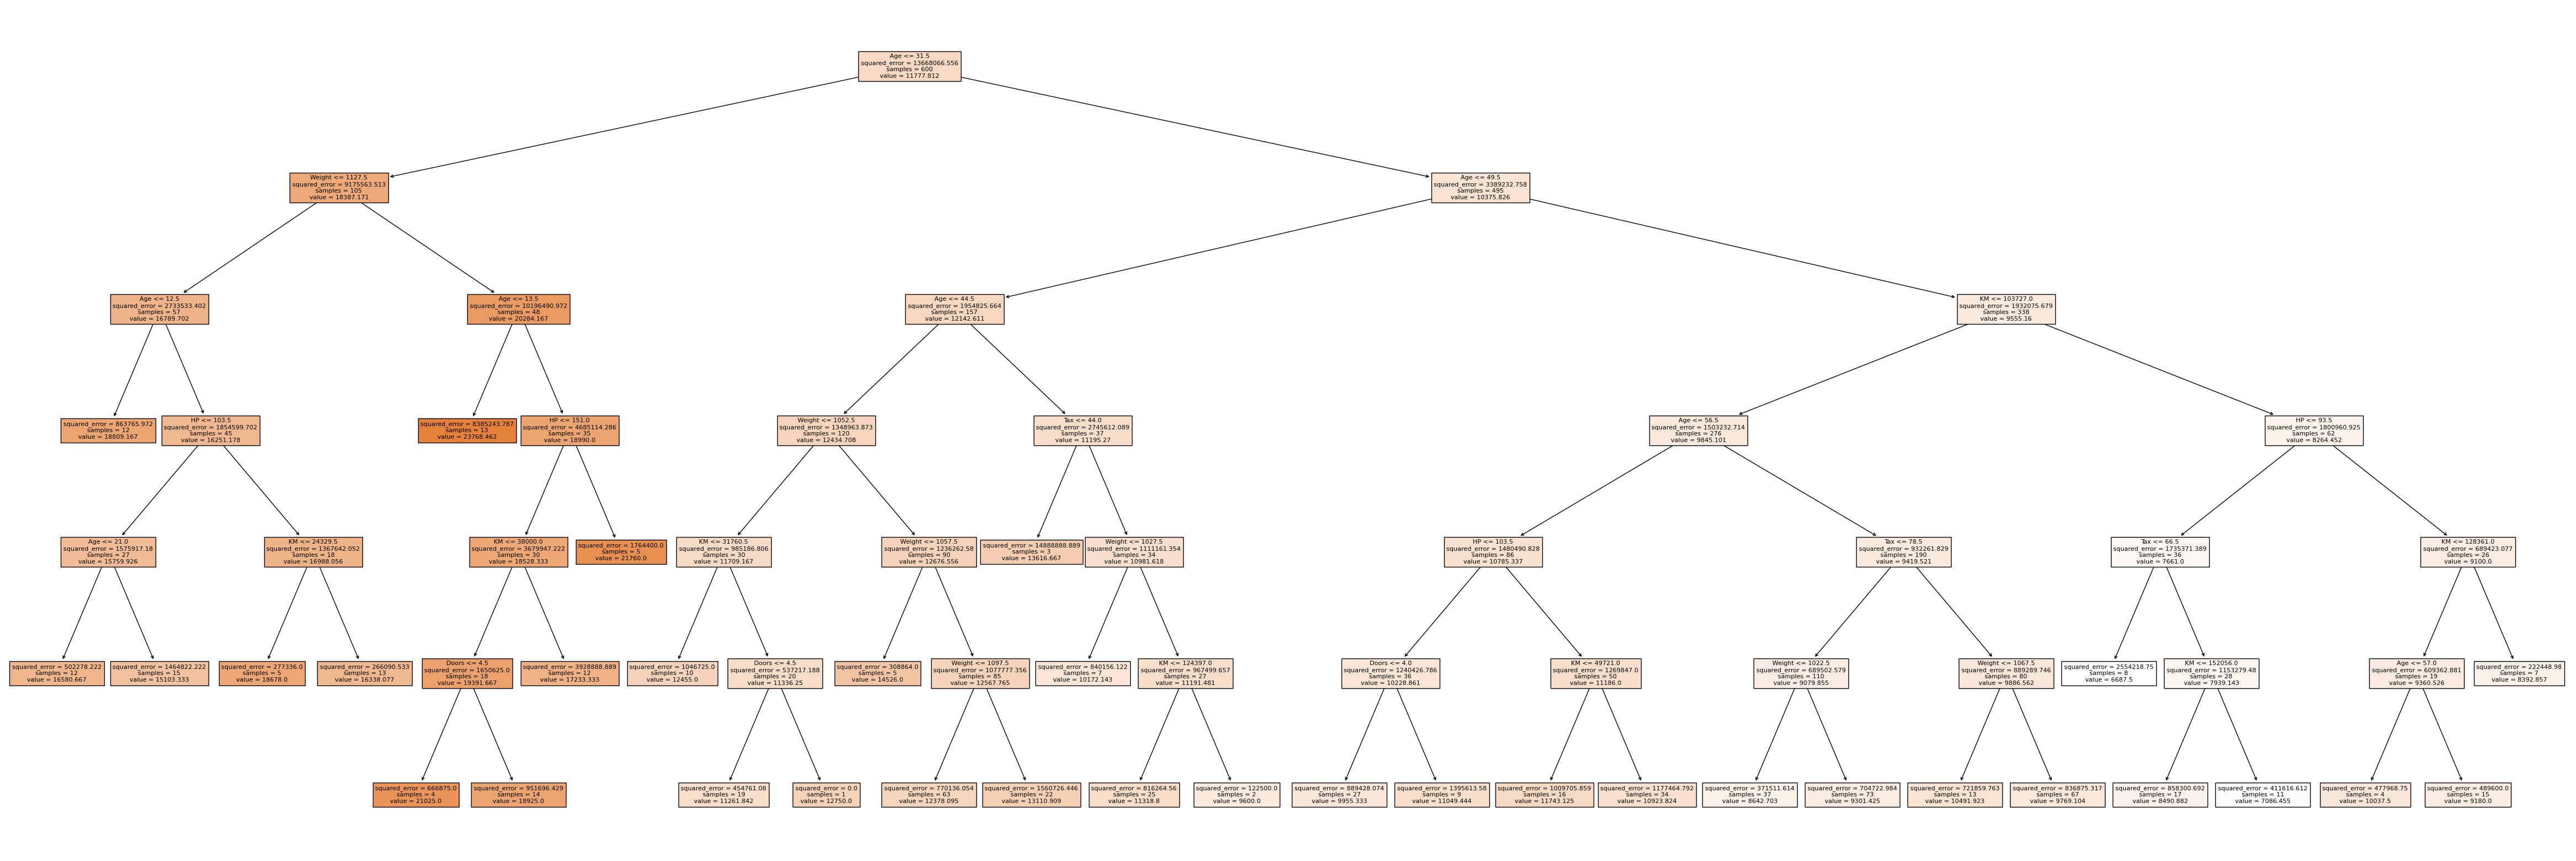

In [19]:
fig = plt.figure(figsize=(60,20))
_ = tr.plot_tree(regTree, 
                   feature_names=train_X.columns, 
                   filled=True)

# 앙상블 Ensembles

In [28]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

import dmba
from dmba import classificationSummary

%matplotlib inline

import matplotlib
matplotlib.use('module://matplotlib_inline.backend_inline')

import matplotlib.pyplot as plt

In [29]:
bank_df = pd.read_csv('../data/UniversalBank.csv')
bank_df.drop(columns=['ID', 'ZIP Code'], inplace=True)

# split into training and validation
X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.40, random_state=3)

## Single Tree

In [30]:
defaultTree = DecisionTreeClassifier(random_state=1)
defaultTree.fit(X_train, y_train)

classes = defaultTree.classes_
classificationSummary(y_valid, defaultTree.predict(X_valid), class_names=defaultTree.classes_)

Confusion Matrix (Accuracy 0.9825)

       Prediction
Actual    0    1
     0 1778   15
     1   20  187


## Hard Voting

In [35]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import GaussianNB

log_clf = LogisticRegression(max_iter=10000) 
tree_clf = DecisionTreeClassifier()
nb_clf = GaussianNB()

voting_clf = VotingClassifier(
    estimators = [('log', log_clf), ('tree', tree_clf), ('nb', nb_clf)], voting='hard')

voting_clf.fit(X_train, y_train)

classes = voting_clf.classes_
classificationSummary(y_valid, voting_clf.predict(X_valid), class_names=voting_clf.classes_)

Confusion Matrix (Accuracy 0.9600)

       Prediction
Actual    0    1
     0 1764   29
     1   51  156


In [36]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, tree_clf, nb_clf, voting_clf): 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(clf.__class__.__name__, accuracy_score(y_valid, y_pred))

LogisticRegression 0.949
DecisionTreeClassifier 0.9835
GaussianNB 0.8795
VotingClassifier 0.959


## Soft Voting

In [37]:
log_clf = LogisticRegression(max_iter=10000) 
tree_clf = DecisionTreeClassifier()
nb_clf = GaussianNB()

soft_clf = VotingClassifier(
    estimators = [('log', log_clf), ('tree', tree_clf), ('nb', nb_clf)], voting='soft')

soft_clf.fit(X_train, y_train)

classes = soft_clf.classes_
classificationSummary(y_valid, soft_clf.predict(X_valid), class_names=soft_clf.classes_)

Confusion Matrix (Accuracy 0.9650)

       Prediction
Actual    0    1
     0 1767   26
     1   44  163


In [38]:
for clf in (log_clf, tree_clf, nb_clf, soft_clf): 
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    print(clf.__class__.__name__, accuracy_score(y_valid, y_pred))

LogisticRegression 0.949
DecisionTreeClassifier 0.9845
GaussianNB 0.8795
VotingClassifier 0.9625


## Bagging

In [41]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=1), 
                            n_estimators=100, random_state=1)
bagging.fit(X_train, y_train)

classificationSummary(y_valid, bagging.predict(X_valid), class_names=classes)

Confusion Matrix (Accuracy 0.9855)

       Prediction
Actual    0    1
     0 1781   12
     1   17  190


In [48]:
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=1), 
                            n_estimators=100, 
                            max_samples = 500, # max_samples = 0.7 처럼 비율 지정 가능
                            bootstrap = True, # bagging, bootstrap = False is Pasting
                            max_features = 0.7,  # 속성은 최대 70%만 선택
                            bootstrap_features = True, # 속성도 bootstrapping 할 수 있음
                            random_state=1)
bagging.fit(X_train, y_train)

classificationSummary(y_valid, bagging.predict(X_valid), class_names=classes)

Confusion Matrix (Accuracy 0.9570)

       Prediction
Actual    0    1
     0 1793    0
     1   86  121


## RandomForest

## Table 9.8 and Figure 9-15

In [20]:
bank_df = pd.read_csv('../data/UniversalBank.csv')
bank_df = bank_df.drop(columns=['ID', 'ZIP Code'])

X = bank_df.drop(columns=['Personal Loan'])
y = bank_df['Personal Loan']
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

rf = RandomForestClassifier(n_estimators=500, random_state=1)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=1)

Variable importance plot

               feature  importance       std
7   Securities Account    0.003964  0.004998
9               Online    0.006394  0.005350
10          CreditCard    0.007678  0.007053
6             Mortgage    0.034243  0.023469
1           Experience    0.035539  0.016061
0                  Age    0.036258  0.015858
8           CD Account    0.057917  0.043185
3               Family    0.111375  0.053146
4                CCAvg    0.172105  0.103011
5            Education    0.200772  0.101002
2               Income    0.333756  0.129227


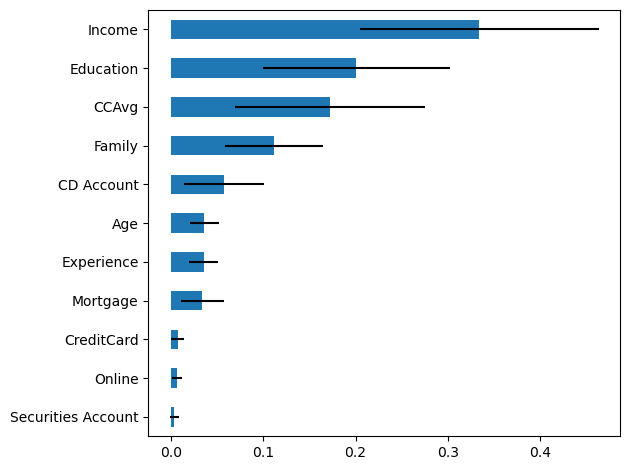

In [21]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_], axis=0)

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances, 'std': std})
df = df.sort_values('importance')
print(df)

ax = df.plot(kind='barh', xerr='std', x='feature', legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show()

Confusion matrix and metrics

In [22]:
classificationSummary(valid_y, rf.predict(valid_X))

Confusion Matrix (Accuracy 0.9820)

       Prediction
Actual    0    1
     0 1803    4
     1   32  161


## Boosting

In [40]:
boost = AdaBoostClassifier(DecisionTreeClassifier(random_state=1), 
                           n_estimators=100, 
                           random_state=1)
boost.fit(X_train, y_train)

classificationSummary(y_valid, boost.predict(X_valid), class_names=classes)

Confusion Matrix (Accuracy 0.9835)

       Prediction
Actual    0    1
     0 1776   17
     1   16  191


## Table 9.9

In [56]:
boost = GradientBoostingClassifier(max_depth=5,
                                  n_estimators = 20,
                                  learning_rate = 1.0)
boost.fit(train_X, train_y)
classificationSummary(valid_y, boost.predict(valid_X))

Confusion Matrix (Accuracy 0.9835)

       Prediction
Actual    0    1
     0 1794   13
     1   20  173


## Figure 9.16

/Users/fastbat/opt/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


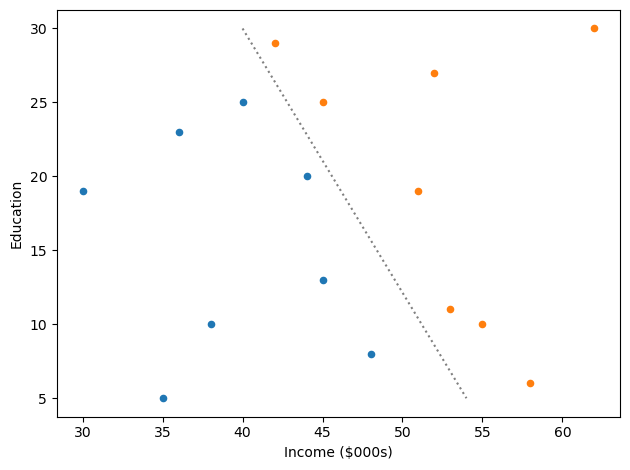

In [26]:
fakeScatter = pd.DataFrame([
    (30, 19, 1), (35, 5, 1), (40, 25, 1), (45, 13, 1), 
    (38, 10, 1), (36, 23, 1), (48, 8, 1), (44, 20, 1), (50, 12),
    (51, 19, 0), (62, 30, 0), (42, 29, 0), (45, 25, 0), 
    (55, 10, 0), (52, 27, 0), (58, 6, 0), (53, 11, 0), 
], columns=['x', 'y', 'category'])
ax = fakeScatter.loc[fakeScatter.category==1,:].plot.scatter(x='x', y='y', color='C0')
fakeScatter.loc[fakeScatter.category==0,:].plot.scatter(x='x', y='y', ax=ax, color='C1')
plt.plot((40, 54), (30, 5), ':', color='grey')
ax.set_xlabel('Income ($000s)')
ax.set_ylabel('Education')

plt.tight_layout()
plt.show()